In [1]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from pathlib import Path

In [2]:
# Define path to the data directory
data_dir = Path('D:\\GIM 1st Year\\Term 5\\AML\\Final Project')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [7]:
import pandas as pd

In [8]:
# Here we get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Getting the list of images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

train_data = []

# Here we are going through all normal cases and labeling them as 0
for img in normal_cases:
    train_data.append((img,0))

# Here we are going through all Pneumonia cases and labeling them as 1
for img in pneumonia_cases:
    train_data.append((img, 1))

train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

train_data.head()

,image,label
0,D:\GIM 1st Year\Term 5\AML\Final Project\train...,0
1,D:\GIM 1st Year\Term 5\AML\Final Project\train...,0
2,D:\GIM 1st Year\Term 5\AML\Final Project\train...,0
3,D:\GIM 1st Year\Term 5\AML\Final Project\train...,0
4,D:\GIM 1st Year\Term 5\AML\Final Project\train...,0


In [10]:
train_data = train_data.sample(frac=1.).reset_index(drop=True)


In [11]:
train_data.head()

,image,label
0,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
1,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
2,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
3,D:\GIM 1st Year\Term 5\AML\Final Project\train...,0
4,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1


In [9]:
train_data.tail()

,image,label
5211,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
5212,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
5213,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
5214,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1
5215,D:\GIM 1st Year\Term 5\AML\Final Project\train...,1


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1    3875
0    1341
Name: label, dtype: int64


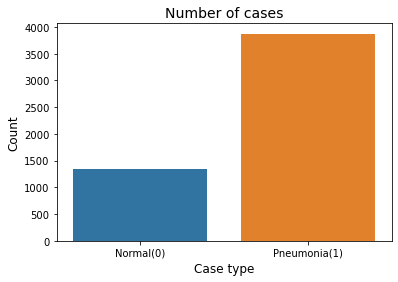

In [20]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()


In [ ]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
163/163 [==============================] - 1675s 10s/step - loss: 0.3393 - accuracy: 0.8570 - val_loss: 0.3136 - val_accuracy: 0.8606
Epoch 2/25
163/163 [==============================] - 66s 406ms/step - loss: 0.2367 - accuracy: 0.8988 - val_loss: 0.4257 - val_accuracy: 0.8013
Epoch 3/25
163/163 [==============================] - 67s 408ms/step - loss: 0.1935 - accuracy: 0.9212 - val_loss: 0.4846 - val_accuracy: 0.7821
Epoch 4/25
163/163 [==============================] - 67s 410ms/step - loss: 0.1957 - accuracy: 0.9237 - val_loss: 0.6628 - val_accuracy: 0.7692
Epoch 5/25
163/163 [==============================] - 66s 404ms/step - loss: 0.1616 - accuracy: 0.9398 - val_loss: 0.5013 - val_accuracy: 0.8141
Epoch 6/25
163/163 [==============================] - 66s 403ms/step - loss: 0.1684 - accuracy: 0.9331 - val_loss: 0.4168 - val_accuracy: 0.8494
Epoch 7/25
163/163 [==============================] - 66s 404ms/step - loss: 0.1505 - accuracy: 0.9400 - val_loss: 0.5729 - val_ac

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Datasets/val/NORMAL/one.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

array([[0.9982185]], dtype=float32)

In [ ]:
if result[0]<=0.5:
    print("Normal")
else:
    print("Pneumonia!!")

Pneumonia!!
